In [6]:
%pip install wordcloud
%pip install TextBlob

Note: you may need to restart the kernel to use updated packages.
     -------------------------------------- 636.8/636.8 kB 5.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import nltk
import regex as re
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from textblob import TextBlob
from collections import Counter

In [8]:
#defining functions to tokenize,lower test, remove stop words and remove certain non-english words
def tokenize(text):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text)
def lower_text(text):
    return text.lower()
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

def remove_words(tokens):
    return [t for t in tokens if t.lower() not in ['thairap','phasa','espa','portugu','deutsch','italiano',"i'm" ,'contributorstranslationsenglishportuguêsitalianoहिन्दीdeutschfrançaisespañolcymraegไทย',
                                                   'contributorstranslationstürkçeespañolenglishportuguêsfrançaisdanskdeutschsicko']]


In [9]:
#importing and defining our stopword list
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
include_stopwords = {'on','lyrics','remix','like'}
stopwords |= include_stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sebpe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:

to_lower_transformer = FunctionTransformer(lower_text)
tokenizer_transformer = FunctionTransformer(tokenize)
remove_stop_transformer = FunctionTransformer(remove_stop)
remove_words_transformer = FunctionTransformer(remove_words)

#creating a pipeline to turn all lyrics to lowercase,tokenize ,remove stop words and remove other words

pipeline_sk = Pipeline([

    ('lower_text', to_lower_transformer),
    ('tokenizer', tokenizer_transformer),
    ('remove_stop', remove_stop_transformer),
    ('remove_words', remove_words_transformer)

])

In [11]:
df = pd.read_csv('data.csv')
#generate a new column 'tokens' with all the identified tokens
df['tokens'] = df['Lyrics'].apply(pipeline_sk.fit_transform)
# generate a new column 'num_tokens' showing the number of tokens
df['num_tokens'] = df['tokens'].map(len)
df .head()


,Lyrics,Genre,tokens,num_tokens
0,1917 ContributorsTranslationsEnglishPortuguêsI...,rap,"[god, look, gonna, go, easy, hurt, feelings, g...",762
1,612 ContributorsTranslationsTürkçeEspañolСрпск...,rap,[contributorstranslationstürkçeespañolсрпскиру...,367
2,998 ContributorsTranslationsTürkçeEspañolРусск...,rap,[contributorstranslationstürkçeespañolрусскийp...,339
3,603 ContributorsTranslationsPortuguêsРусскийIt...,rap,[contributorstranslationsportuguêsрусскийitali...,730
4,869 ContributorsTranslationsTürkçeEspañolРусск...,rap,[contributorstranslationstürkçeespañolрусскийp...,412


In [12]:
counter = Counter()
_ = df['tokens'].map(counter.update)
#displaying the most common words
print(counter.most_common(5))

[('yeah', 1633), ('know', 1473), ('got', 1379), ('get', 1127), ('love', 984)]


In [13]:
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 2')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False).head(15)

[Text(0.5, 0, 'Frequency'),
 Text(0, 0.5, 'Token'),
 Text(0.5, 1.0, 'Most common words in all the lyrics')]

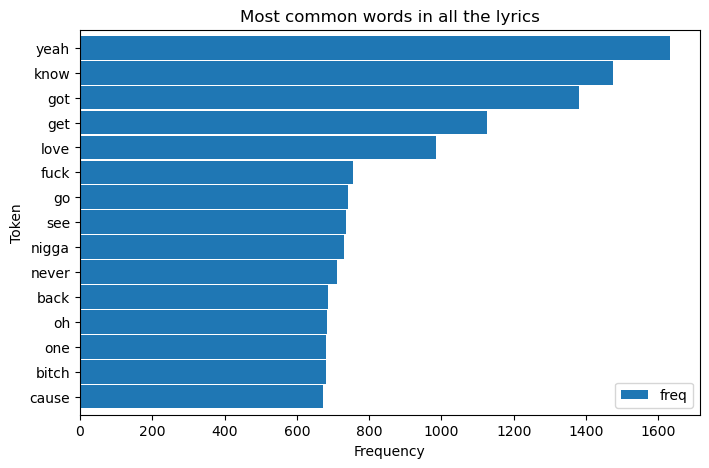

In [14]:
ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(8,5))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Most common words in all the lyrics')

Text(0.5, 1.0, 'Word Cloud for lyrics of all songs')

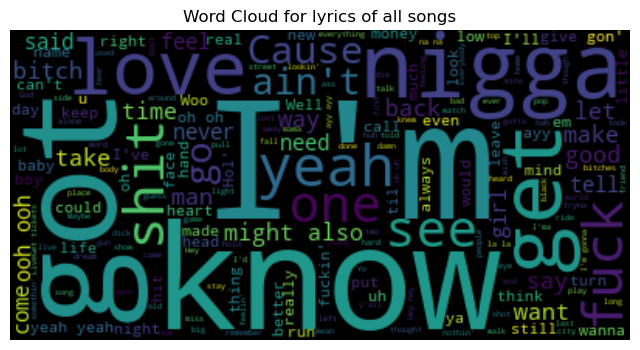

In [15]:
text = " ".join(df['Lyrics'].values)
wc = WordCloud(max_words=200, stopwords=stopwords)
wc.generate(text)

plt.figure(figsize=(8, 6)) ###
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for lyrics of all songs')

Text(0.5, 1.0, 'Word Cloud for rap lyrics')

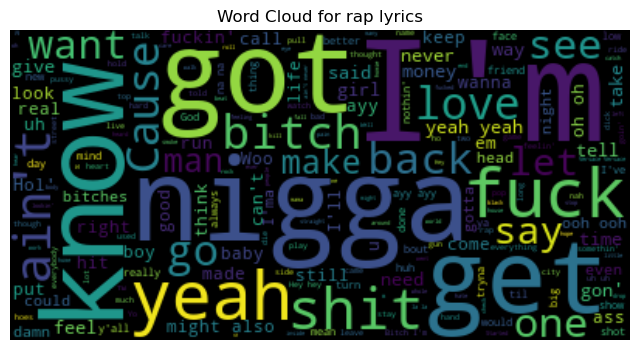

In [16]:
text = " ".join(review for review in df[df['Genre'] == 'rap'].Lyrics)

wc = WordCloud(max_words=200, stopwords=stopwords)
wc.generate(text)

plt.figure(figsize=(8, 6)) ###
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for rap lyrics')

Text(0.5, 1.0, 'Word Cloud for country lyrics')

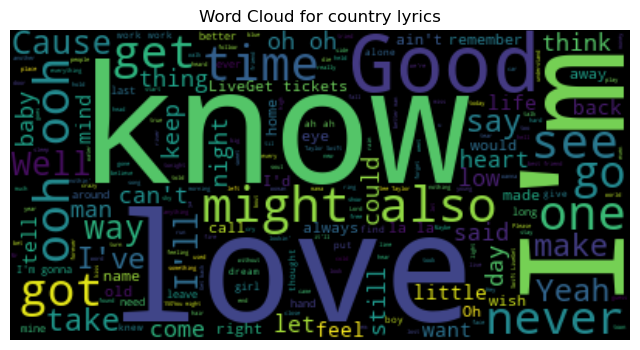

In [17]:
text = " ".join(review for review in df[df['Genre'] == 'country'].Lyrics)

wc = WordCloud(max_words=200, stopwords=stopwords)
wc.generate(text)

plt.figure(figsize=(8, 6)) ###
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for country lyrics')

In [18]:
# Define a function to apply sentiment analysis to a text
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity  # returns a value between -1 and 1

# Create a new column 'sentiment' in the DataFrame
df['sentiment'] = df['Lyrics'].apply(get_sentiment)

In [19]:
df.groupby('Genre')['sentiment'].mean()

Genre
country    0.110574
rap        0.009409
Name: sentiment, dtype: float64